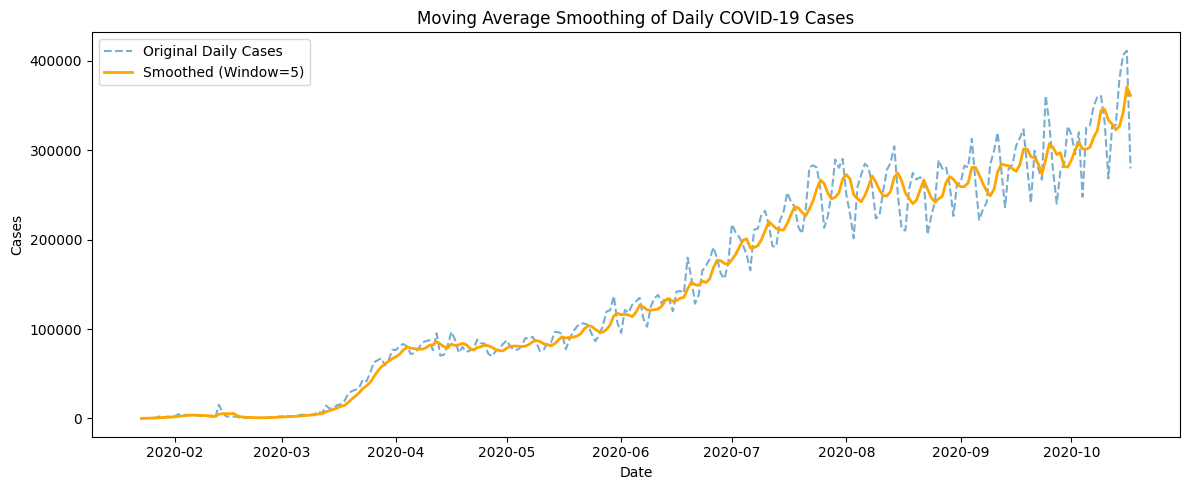

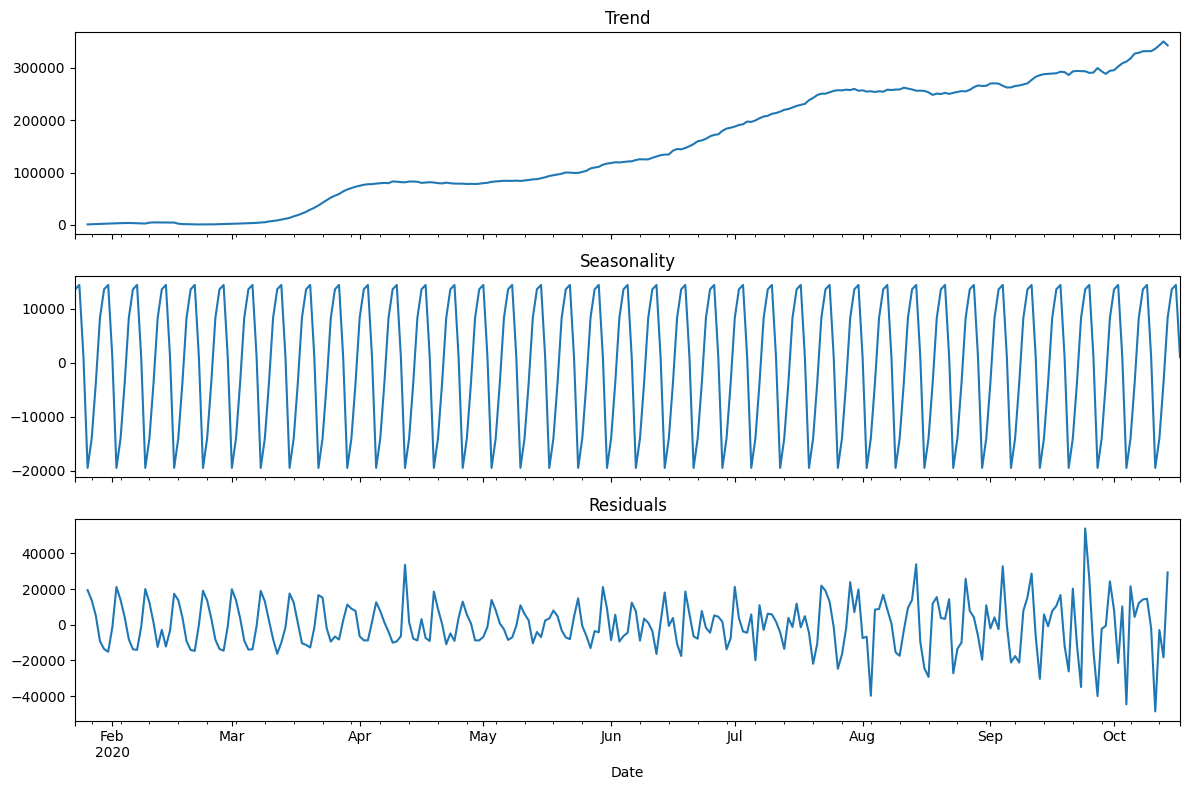

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def moving_average_smoothing(data, window_size):
    """
    Apply moving average smoothing to the data.
    """
    return data.rolling(window=window_size, min_periods=1).mean()

def decompose_time_series(data, period):
    """
    Decompose time series data into trend, seasonality, and residuals.
    """
    return seasonal_decompose(data, period=period, model='additive')

# Load COVID-19 dataset
df = pd.read_csv("/content/time-series-19-covid-combined.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert 'Date' to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

# Aggregate global confirmed cases and calculate daily new cases
daily_df = df.groupby(df.index).sum()
daily_df["daily_cases"] = daily_df["Confirmed"].diff()
daily_df = daily_df.dropna(subset=["daily_cases"])  # Drop initial NaN after diff

# Use 'daily_cases' as time series data
time_series_data = daily_df["daily_cases"]

# Define moving average window size
window_size = 5

# Apply moving average smoothing
smoothed_data = moving_average_smoothing(time_series_data, window_size)

# Decompose time series (e.g., weekly seasonality = 7 days)
period = 7
decomposition = decompose_time_series(time_series_data, period)

# Plot original vs smoothed data
plt.figure(figsize=(12, 5))
plt.plot(time_series_data, label='Original Daily Cases', linestyle='dashed', alpha=0.6)
plt.plot(smoothed_data, label=f'Smoothed (Window={window_size})', linewidth=2, color='orange')
plt.legend()
plt.title('Moving Average Smoothing of Daily COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.tight_layout()
plt.show()

# Plot decomposition results
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title='Trend')
decomposition.seasonal.plot(ax=axes[1], title='Seasonality')
decomposition.resid.plot(ax=axes[2], title='Residuals')
plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')